# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Autoencoders for Anomaly Detection

**Steps**:
1. Data Set: Download a dataset of electricity consumption data.
2. Build an Autoencoder: Construct a simple autoencoder using a neural network for the
normal consumption data.
3. Identify Anomalies: Use the trained model to reconstruct the data and identify anomalies based on reconstruction error.
4. Visualize: Plot both the actual and reconstructed data to highlight anomalies.

=== Autoencoder-based Anomaly Detection ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Anomaly detection threshold (reconstruction error): 0.0000
Total anomalies detected: 51

Anomalies:
       consumption  reconstruction_error  is_anomaly
5      230.953839          1.007084e-05        True
11     238.195779          1.223023e-06        True
68     365.567262          4.419011e-07        True
75     239.333964          6.098923e-07        True
151    226.954867          1.862027e-05        True
153    365.609389          4.425109e-07        True
168    365.720992          4.441087e-07        True
172    375.849771          6.051588e-07        True
225    373.481059          5.653012e-07        True
252    216.207450          1.130899e-04        True
314    390.925713          8.907158e-07        True
336    238.883963          8.270558e-07        True
338    224.806780          2.428921e-05        True
339    236.575082          2.460494e-06        True
367    216.523966          1.05420

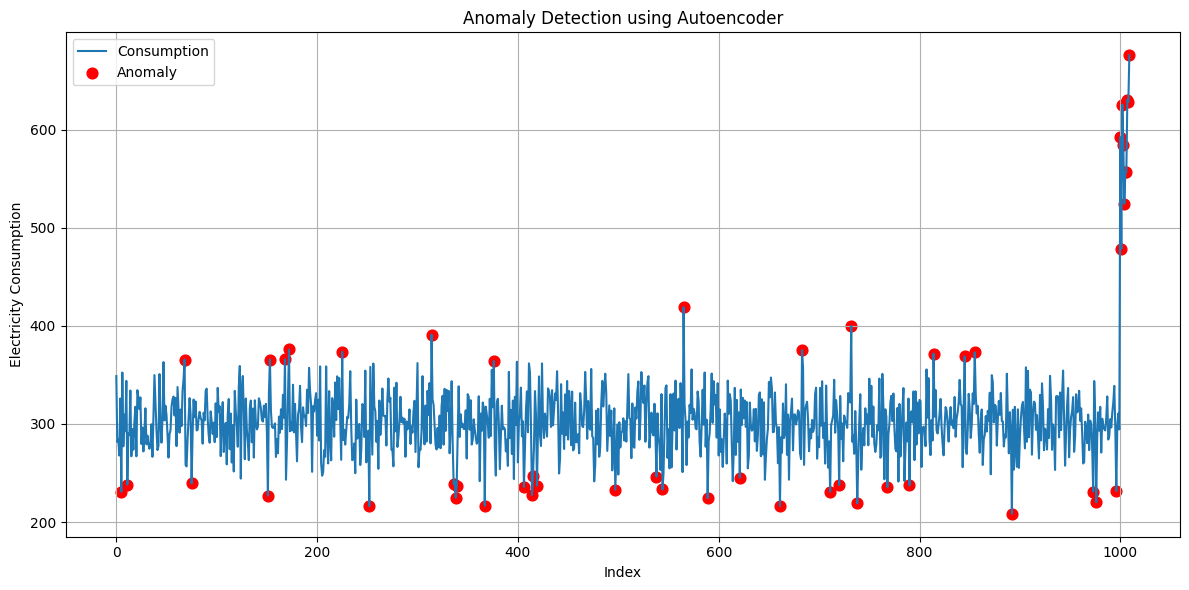

In [4]:

# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import tensorflow as tf

# ---------------------
# Step 1: Generate Electricity Consumption Dataset
# ---------------------
def generate_data():
    np.random.seed(1)
    normal_data = np.random.normal(loc=300, scale=30, size=1000)

    # Inject anomalies
    anomalies = np.random.normal(loc=600, scale=50, size=10)
    consumption = np.concatenate([normal_data, anomalies])
    df = pd.DataFrame({"consumption": consumption})
    return df

# ---------------------
# Step 2: Build Autoencoder
# ---------------------
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(8, activation='relu')(input_layer)
    encoded = Dense(4, activation='relu')(encoded)
    decoded = Dense(8, activation='relu')(encoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# ---------------------
# Step 3: Train and Detect Anomalies
# ---------------------
def detect_anomalies_with_autoencoder(df):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df)

    X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

    model = build_autoencoder(X_train.shape[1])
    model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=0)

    # Reconstruct the data
    reconstructed = model.predict(df_scaled)
    reconstruction_error = np.mean(np.square(df_scaled - reconstructed), axis=1)
    threshold = np.percentile(reconstruction_error, 95)  # Top 5% as anomalies

    df['reconstruction_error'] = reconstruction_error
    df['is_anomaly'] = df['reconstruction_error'] > threshold

    return df, threshold

# ---------------------
# Step 4: Visualize Anomalies
# ---------------------
def visualize(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['consumption'], label="Consumption")
    plt.scatter(df[df['is_anomaly']].index, df[df['is_anomaly']]['consumption'],
                color='red', label="Anomaly", s=60)
    plt.xlabel("Index")
    plt.ylabel("Electricity Consumption")
    plt.title("Anomaly Detection using Autoencoder")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------------
# Main
# ---------------------
if __name__ == "__main__":
    print("=== Autoencoder-based Anomaly Detection ===")
    df = generate_data()
    df, threshold = detect_anomalies_with_autoencoder(df)

    print(f"\nAnomaly detection threshold (reconstruction error): {threshold:.4f}")
    print(f"Total anomalies detected: {df['is_anomaly'].sum()}")
    print("\nAnomalies:\n", df[df['is_anomaly']])

    visualize(df)
